In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc, erf, iv, ive

In [2]:
# --- Function: SNR_regularized_delta_source ---
# Calculates SNR, signal amplitude, and concentration for a regularized delta source chemotaxis model.
# Parameters:
#   r      : radial distance (array)
#   S0     : source strength
#   n      : number of receptors
#   lbda   : chemokine lengthscale
#   KD     : dissociation constant
#   Rcell  : cell radius
#   epsilon: regularization parameter (default=1)
def SNR_regularized_delta_source(r, S0, n, lbda, KD, Rcell, epsilon=1):
    # Avoid division by zero at r=0 by setting r= -1 (will be handled below)
    r[r==0] = -1
    
    # Calculate regularized variables for the model
    r_ep = r / (2 * epsilon)**0.5
    s_ep = (epsilon / 2 / lbda**2)**0.5
    
    # Error function terms for regularization
    Erf1  = erf(r_ep - s_ep)
    Erfc2 = erfc(r_ep + s_ep)
    
    # Regularized concentration profile
    fr = 0.5 * np.exp(s_ep**2) * (1 + Erf1 - np.exp(2 * r / lbda) * Erfc2)
    Cr = S0 * np.exp(-r / lbda) / r * fr
    
    # Correction term for signal amplitude
    fp_over_f = ((8 / np.pi / epsilon)**0.5 * np.exp(-(r_ep - s_ep)**2)
                  - 2 / lbda * Erfc2 * np.exp(2 * r / lbda)) \
                / (1 + Erf1 - Erfc2 * np.exp(2 * r / lbda))
    
    # Signal amplitude profile
    p = 2 * Rcell * np.abs(1 / r + 1 / lbda - fp_over_f)
    
    # Handle r < 0 (from r==0 above): set concentration and signal to limiting values
    Cr[r < 0] = S0 * ((2 / np.pi / epsilon)**0.5 - np.exp(s_ep**2) * (1 - erf(s_ep)) / lbda)
    p[r < 0] = 0
    
    # Variance of signal amplitude
    sigma2_p = 8 * (Cr + KD)**2 / (n * Cr * KD)
    
    # Return SNR, signal amplitude, and concentration profile
    return p**2 / sigma2_p, p, Cr

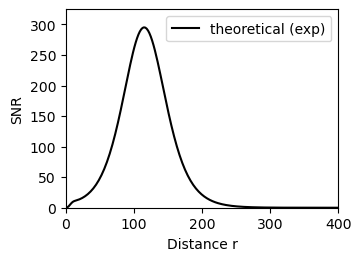

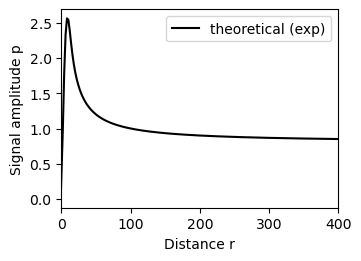

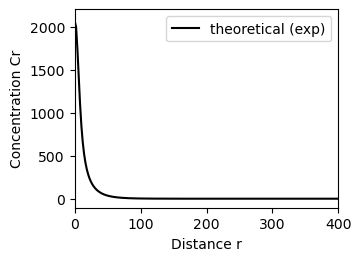

In [3]:
# --- Chemokine Sensing Model: Signal-to-Noise Ratio (SNR) Analysis ---
# This section computes the SNR, signal amplitude, and concentration profiles for a regularized delta source.
# Parameters are chosen to represent typical chemotaxis receptor and ligand properties.
Rcell=10  # Cell radius (arbitrary units)
# Chemokine A
n = 10000  # Number of type A receptors per cell
KD = 1.0   # Dissociation constant for ligand-receptor binding
lbda = 25.0 # Chemokine lengthscale (diffusion-decay parameter)
S0 = 12810.0 # Source strength (in units of gamma)

epsilon = 16 # Regularization parameter for delta source

rmax = 400   # Maximum distance for analysis
r = np.linspace(0, rmax, 200)  # Radial distance array

# --- Compute SNR, signal, and concentration profiles using the regularized delta source model ---
SNR, p, Cr = SNR_regularized_delta_source(r, S0, n, lbda, KD, Rcell, epsilon)

# --- Plot SNR as a function of distance ---
fig, ax = plt.subplots(figsize=(3.5, 2.5), layout='constrained')
ax.plot(r, SNR, '-k', label='theoretical (exp)')

ax.set_xlim([0, rmax])
ax.set_ylim([0, 1.1 * np.max(SNR)])
ax.set_xlabel('Distance r')
ax.set_ylabel('SNR')
ax.legend()

# --- Plot signal amplitude p as a function of distance ---
fig, ax = plt.subplots(figsize=(3.5, 2.5), layout='constrained')
ax.plot(r, p, '-k', label='theoretical (exp)')
ax.set_xlim([0, rmax])
ax.set_xlabel('Distance r')
ax.set_ylabel('Signal amplitude p')
ax.legend()

# --- Plot concentration profile Cr as a function of distance ---
fig, ax = plt.subplots(figsize=(3.5, 2.5), layout='constrained')
ax.plot(r, Cr, '-k', label='theoretical (exp)')
ax.set_xlim([0, rmax])
ax.set_xlabel('Distance r')
ax.set_ylabel('Concentration Cr')
ax.legend()


0.01 0.01


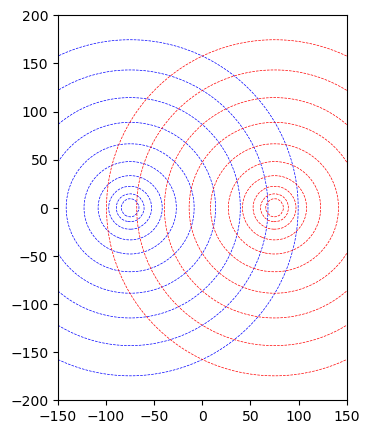

In [4]:
Rcell = 10

n = 50000 # number of type A receptors
KD = 1.0 # dissociation constant A
lmbda = 100.0 # chemokine lengthscale A 0.05-0.1 nM/s
S0 = 10000.0 # source A size in units of gamma

epsilon =1

S0 = 1*S0
lmbda = 1*lmbda
nA, KDA, lambdaA, SA = n, KD, lmbda, S0
nB, KDB, lambdaB, SB = n, KD, lmbda, S0

lambdaB =lmbda
SB = S0
KDB = KD

KA = KDA/SA*lambdaA
KB = KDB/SB*lambdaB
print(KA,KB)

x0A,y0A = -75,0 #position source A
x0B,y0B = 75,0 #position source B

xgrid = np.linspace(-150, 150,100)
ygrid = np.linspace(-200, 200,100)

X, Y = np.meshgrid(xgrid, ygrid)
rA = ((X-x0A)**2+(Y-y0A)**2)**0.5
rB = ((X-x0B)**2+(Y-y0B)**2)**0.5

SNRA, pA, CrA = SNR_regularized_delta_source(rA,SA,nA,lambdaA,KDA,Rcell,epsilon)
SNRB, pB, CrB = SNR_regularized_delta_source(rB,SB,nB,lambdaB,KDB,Rcell,epsilon)

phiA = np.arctan2(-(Y-y0A),-(X-x0A))
phiB = np.arctan2(-(Y-y0B),-(X-x0B))



levels = S0*np.logspace(-3,-1,10)
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')
ax.contour(X, Y, CrA, levels=levels, linewidths=0.5, linestyles='dashed', colors='b')
ax.contour(X, Y, CrB, levels=levels, linewidths=0.5, linestyles='dashed', colors='r')
